In [10]:
import numpy as np
import torch

# 微分

In [11]:
# requires_gradは勾配を計算する場合に必要
x = torch.ones(2,2 , requires_grad = True)

In [12]:
y = x + 2

In [13]:
z = (y**2).mean()

In [14]:
# zの微分
z.backward()

In [15]:
# xの傾き
print(x.grad)

tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


# 平均２乗誤差：MES

## 回帰問題で使われる

In [25]:
from matplotlib import pyplot as plt

In [18]:
x_data = [1.0, 2.0, 3.0, 4.0, 5.0]
y_data = [3.0, 6.0, 9.0, 12.0, 15.0]

def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

w_list = []
MES_list = []

In [21]:
for w in np.arange(0.0, 6.5,0.5):
    print("w=" , w)
    loss_sum = 0
    
    for x, y in zip(x_data,y_data):
        
        y_pred = forward(x)
        loss_val = loss(x,y)
        loss_sum += loss_val
        print("\t", x,y,y_pred,loss_val)
        
    print("MES=", loss_sum/len(x_data))
    w_list.append(w)
    MES_list.append(loss_sum/len(x_data))

w= 0.0
	 1.0 3.0 0.0 9.0
	 2.0 6.0 0.0 36.0
	 3.0 9.0 0.0 81.0
	 4.0 12.0 0.0 144.0
	 5.0 15.0 0.0 225.0
MES= 99.0
w= 0.5
	 1.0 3.0 0.5 6.25
	 2.0 6.0 1.0 25.0
	 3.0 9.0 1.5 56.25
	 4.0 12.0 2.0 100.0
	 5.0 15.0 2.5 156.25
MES= 68.75
w= 1.0
	 1.0 3.0 1.0 4.0
	 2.0 6.0 2.0 16.0
	 3.0 9.0 3.0 36.0
	 4.0 12.0 4.0 64.0
	 5.0 15.0 5.0 100.0
MES= 44.0
w= 1.5
	 1.0 3.0 1.5 2.25
	 2.0 6.0 3.0 9.0
	 3.0 9.0 4.5 20.25
	 4.0 12.0 6.0 36.0
	 5.0 15.0 7.5 56.25
MES= 24.75
w= 2.0
	 1.0 3.0 2.0 1.0
	 2.0 6.0 4.0 4.0
	 3.0 9.0 6.0 9.0
	 4.0 12.0 8.0 16.0
	 5.0 15.0 10.0 25.0
MES= 11.0
w= 2.5
	 1.0 3.0 2.5 0.25
	 2.0 6.0 5.0 1.0
	 3.0 9.0 7.5 2.25
	 4.0 12.0 10.0 4.0
	 5.0 15.0 12.5 6.25
MES= 2.75
w= 3.0
	 1.0 3.0 3.0 0.0
	 2.0 6.0 6.0 0.0
	 3.0 9.0 9.0 0.0
	 4.0 12.0 12.0 0.0
	 5.0 15.0 15.0 0.0
MES= 0.0
w= 3.5
	 1.0 3.0 3.5 0.25
	 2.0 6.0 7.0 1.0
	 3.0 9.0 10.5 2.25
	 4.0 12.0 14.0 4.0
	 5.0 15.0 17.5 6.25
MES= 2.75
w= 4.0
	 1.0 3.0 4.0 1.0
	 2.0 6.0 8.0 4.0
	 3.0 9.0 12.0 9.0
	 4.0 12.0 16.0 16.0
	 

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


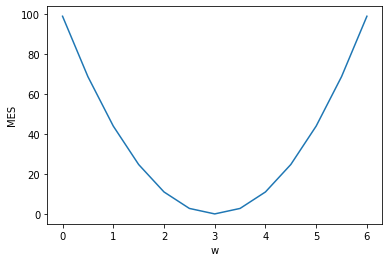

In [26]:
plt.plot(w_list, MES_list)
plt.ylabel('MES')
plt.xlabel('w')
plt.show()

# 勾配降下法（Gradient Descent）

In [28]:
x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0], dtype=np.float32)
y_data = np.array([3.0, 6.0, 9.0, 12.0, 15.0], dtype=np.float32)

In [32]:
w = 1.0
w_list= [w]
loss_list = []

def forward(x):
    return x*w

def loss(y,y_grad):
    return ((y_pred - y) ** 2).mean()

def gradient(x,y,y_pred):
    return np.dot(2*x, y_pred-y).mean()
 


In [34]:
epochs = 10
lr=0.01

for epoch in range(epochs):
    y_pred = forward(x_data)
    loss_val = loss(y_data, y_pred)
    
    grad_val = gradient(x_data, y_data, y_pred)
    w = w - lr * grad_val
    w_list.append(w)
    loss_list.append(loss_val)
    
    print(f'epoch {epoch}: w = {w: 3f}: loss {loss_val:3f}' )
    

epoch 0: w =  2.980000: loss 0.440000
epoch 1: w =  3.002000: loss 0.004400
epoch 2: w =  2.999800: loss 0.000044
epoch 3: w =  3.000020: loss 0.000000
epoch 4: w =  2.999998: loss 0.000000
epoch 5: w =  3.000000: loss 0.000000
epoch 6: w =  3.000000: loss 0.000000
epoch 7: w =  3.000000: loss 0.000000
epoch 8: w =  3.000000: loss 0.000000
epoch 9: w =  3.000000: loss 0.000000


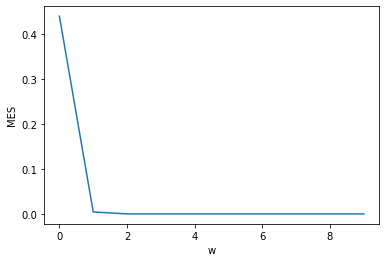

In [39]:
## 損失のグラフ化
plt.plot(loss_list)
plt.ylabel('MES')
plt.xlabel('w')
plt.show()

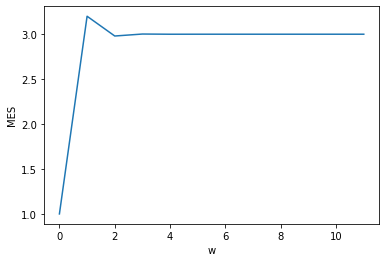

In [40]:
## 傾きのグラフ化
plt.plot(w_list)
plt.ylabel('MES')
plt.xlabel('w')
plt.show()

In [42]:
import torch 
import torch.nn as nn

### モデルの定義

In [44]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self, x):
        y_pred= self.linear(x)
        return y_pred

In [47]:
torch.manual_seed(3)

model = Model(1 ,1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [49]:
X = torch.tensor([1,2,3,4,5] , dtype=torch.float).view(-1, 1)
Y = torch.tensor([3,6,9,12,15] , dtype=torch.float).view(-1, 1)

In [51]:
epochs = 30
loss_list= []
w_list = []

for epoch in range(epochs):
    y_pred = model.forward(X)
    loss_val = criterion(y_pred, Y)
    
    optimizer.zero_grad()
    loss_val.backward()
    optimizer.step()
    
    loss_list.append(loss_val)
    w_list.append(model.linear.weight.item())

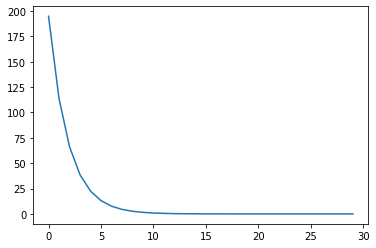

In [52]:
plt.plot(loss_list)

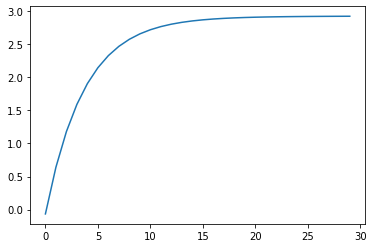

In [53]:
plt.plot(w_list)